In [1]:
import pandas as pd
import numpy as np
import sys
import os
import json
import ast
# Get the parent directory of the current file (notebook)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add the parent directory to sys.path
sys.path.append(parent_dir)

In [2]:
df = pd.read_csv(f"{parent_dir}/Data/ground_truth_distances_4model.csv").drop(['Unnamed: 0'], axis=1)

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming 'df' is your DataFrame and 'features' contains the feature columns
X = df.drop(columns=['person', 'label'])
y = df['label']

# Perform PCA and T-SNE on the entire dataset
# 1. PCA with 2 components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)

# 2. PCA with 3 components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X)

# 3. T-SNE with 2 components
tsne_2 = TSNE(n_components=2, random_state=42)
X_tsne_2 = tsne_2.fit_transform(X)

# 4. T-SNE with 3 components
tsne_3 = TSNE(n_components=3, random_state=42)
X_tsne_3 = tsne_3.fit_transform(X)

# Function to evaluate a model
def evaluate_model(X_reduced, y, test_size=0.2, random_state=42):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=test_size, random_state=random_state, stratify=y)
    
    # Train logistic regression model on reduced data
    lr_model = LogisticRegression(random_state=random_state)
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    
    # Calculate accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
    
    return accuracy, auc

# Evaluate each method
accuracy_pca_2, auc_pca_2 = evaluate_model(X_pca_2, y)
accuracy_pca_3, auc_pca_3 = evaluate_model(X_pca_3, y)
accuracy_tsne_2, auc_tsne_2 = evaluate_model(X_tsne_2, y)
accuracy_tsne_3, auc_tsne_3 = evaluate_model(X_tsne_3, y)

# Print the results
print(f"PCA (2 components) - Accuracy: {accuracy_pca_2:.4f}, AUC: {auc_pca_2:.4f}")
print(f"PCA (3 components) - Accuracy: {accuracy_pca_3:.4f}, AUC: {auc_pca_3:.4f}")
print(f"T-SNE (2 components) - Accuracy: {accuracy_tsne_2:.4f}, AUC: {auc_tsne_2:.4f}")
print(f"T-SNE (3 components) - Accuracy: {accuracy_tsne_3:.4f}, AUC: {auc_tsne_3:.4f}")

# Choose the best method
best_method = max(
    ("PCA (2 components)", accuracy_pca_2, auc_pca_2),
    ("PCA (3 components)", accuracy_pca_3, auc_pca_3),
    ("T-SNE (2 components)", accuracy_tsne_2, auc_tsne_2),
    ("T-SNE (3 components)", accuracy_tsne_3, auc_tsne_3),
    key=lambda x: x[2]  # Comparing based on AUC
)

print(f"\nBest method: {best_method[0]} with AUC: {best_method[2]:.4f} and Accuracy: {best_method[1]:.4f}")


PCA (2 components) - Accuracy: 0.7500, AUC: 0.6875
PCA (3 components) - Accuracy: 0.7500, AUC: 0.6875
T-SNE (2 components) - Accuracy: 0.6875, AUC: 0.6042
T-SNE (3 components) - Accuracy: 0.7500, AUC: 0.7083

Best method: T-SNE (3 components) with AUC: 0.7083 and Accuracy: 0.7500


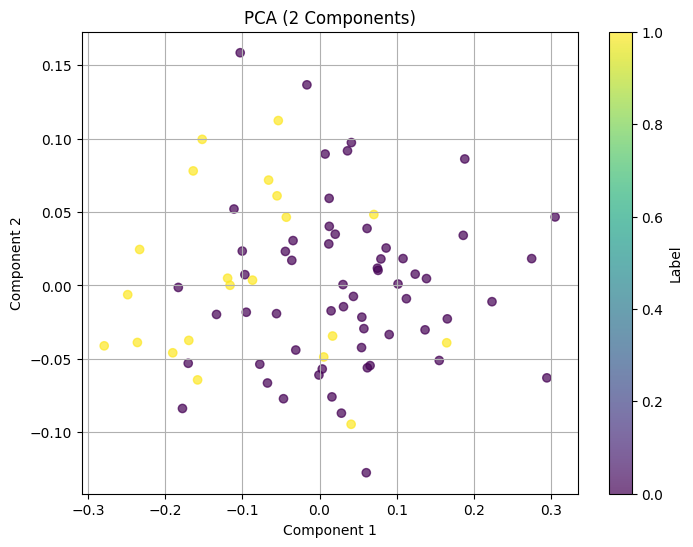

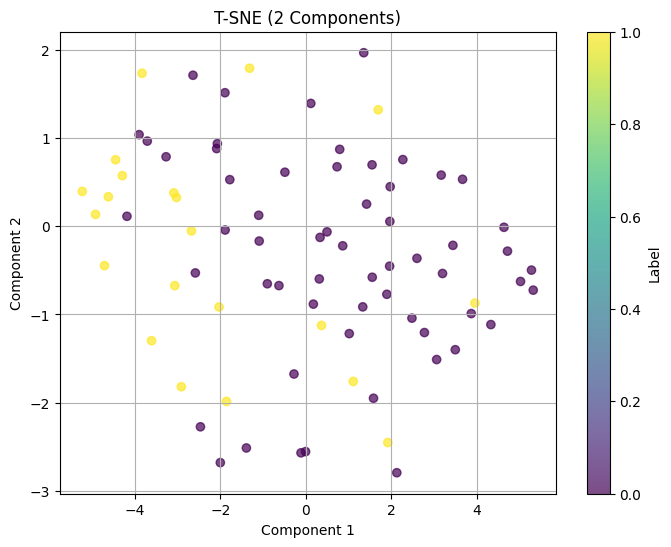

In [4]:
import matplotlib.pyplot as plt

# Visualization function for PCA and T-SNE results
def visualize_method(X_reduced, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(scatter, label='Label')
    plt.grid(True)
    plt.show()

# Visualize PCA with 2 components
visualize_method(X_pca_2, y, 'PCA (2 Components)')

# Visualize PCA with 3 components (Note: only 2 components will be shown for consistency in visualization)

# Visualize T-SNE with 2 components
visualize_method(X_tsne_2, y, 'T-SNE (2 Components)')

# Visualize T-SNE with 3 components (Note: only 2 components will be shown for consistency in visualization)


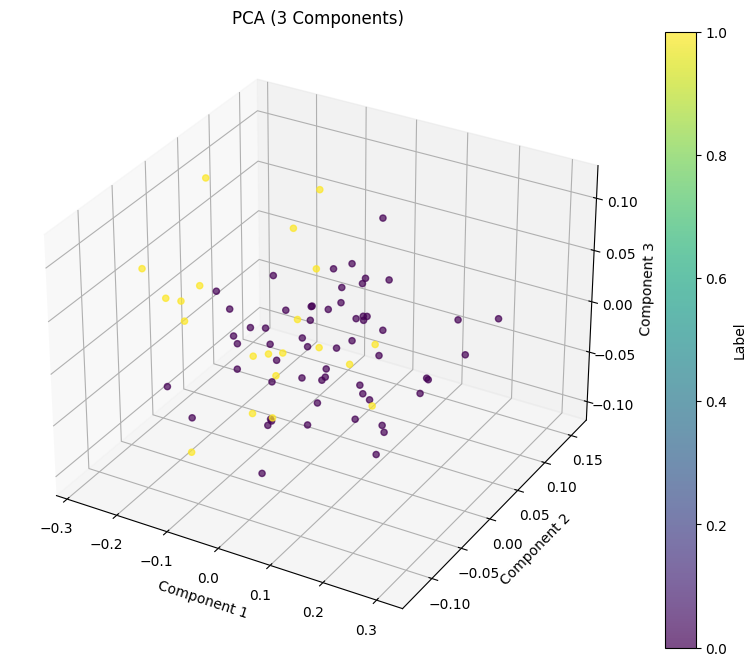

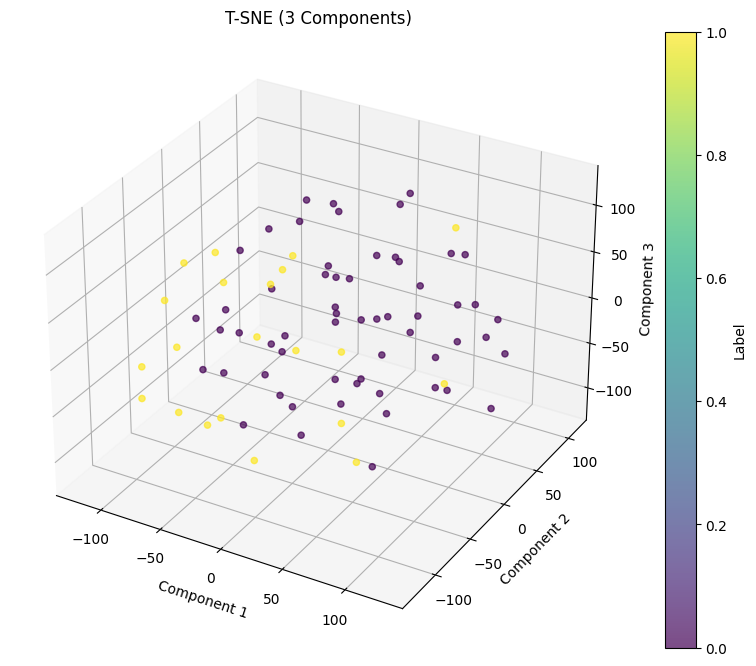

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualization function for 3D PCA and T-SNE results
def visualize_3d_method(X_reduced, y, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap='viridis', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    fig.colorbar(scatter, label='Label')
    plt.show()

# Visualize PCA with 3 components
visualize_3d_method(X_pca_3, y, 'PCA (3 Components)')

# Visualize T-SNE with 3 components
visualize_3d_method(X_tsne_3, y, 'T-SNE (3 Components)')


In [10]:
df['TSNE1'] = X_tsne_3[:, 0]
df['TSNE2'] = X_tsne_3[:, 1]
df['TSNE3'] = X_tsne_3[:, 2]

In [12]:
df = df[['person', 'label', 'TSNE1', 'TSNE2', 'TSNE3']]

In [13]:
df

,person,label,TSNE1,TSNE2,TSNE3
0,ש16.docx,0,73.572212,-54.014801,-5.597681
1,י20.docx,0,8.639190,-4.507747,27.915064
2,ש4.docx,0,35.254543,23.839191,8.656634
3,י16.docx,0,-16.296686,57.865910,8.524014
4,ש20.docx,0,95.043053,-13.418912,-19.370310
...,...,...,...,...,...
75,אש2.docx,1,-118.708099,-16.004313,-56.241741
76,יפ12.docx,1,-49.465317,-83.235573,-67.889618
77,אש3.docx,1,-119.993980,-28.311056,3.196724
78,יפ5.docx,1,-4.213622,-93.711906,-80.453934
